In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/NFLX.csv")
print(data)

print(data.head)

            Date        Open        High         Low       Close   Adj Close  \
0     05-02-2018  262.000000  267.899994  250.029999  254.259995  254.259995   
1     06-02-2018  247.699997  266.700012  245.000000  265.720001  265.720001   
2     07-02-2018  266.579987  272.450012  264.329987  264.559998  264.559998   
3     08-02-2018  267.079987  267.619995  250.000000  250.100006  250.100006   
4     09-02-2018  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  31-01-2022  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  01-02-2022  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  02-02-2022  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  03-02-2022  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  04-02-2022  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1    

Mean Squared Error: 1.6523777319911772e-26


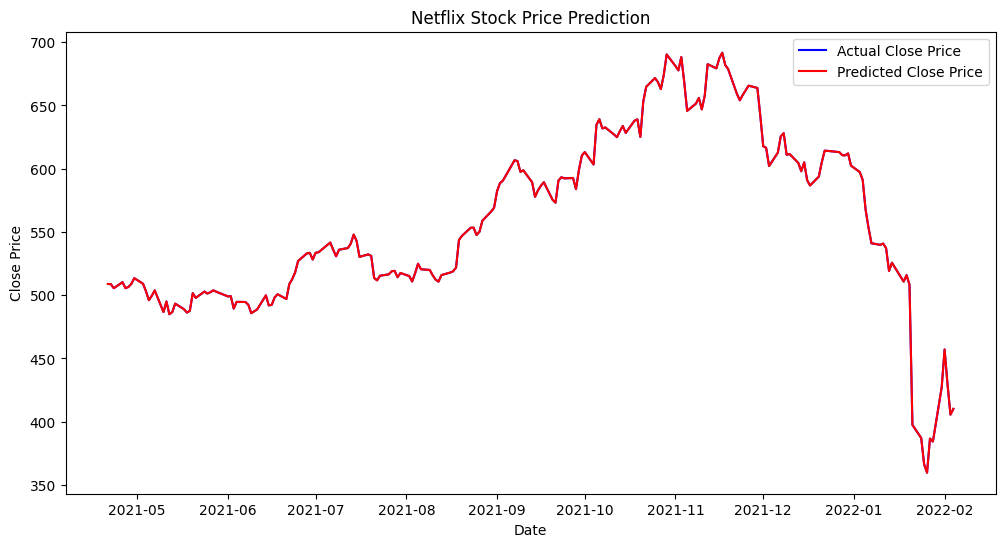

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv("/content/NFLX.csv")

# Parse dates and set 'Date' as the index
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Fetch day, month, and year from the 'Date' column
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Select features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day', 'Month', 'Year']
target = 'Close'

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare the testing data
X_test = test_data[features]
y_test = test_data[target]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Sort test data by index
test_data = test_data.sort_index()

# Plot the actual vs. predicted closing prices
# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Close Price', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Close Price', color='red')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
